In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from PIL import Image
from pylab import rcParams
import string
import random
# import geopandas as gpd

In [104]:
df = pd.read_csv('encounter-events-v20170717.csv')
df.head()

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
0,416565000,354240000,2016-11-18T14:30:00Z,2016-11-19T01:50:00Z,-17.039085,-79.063725,11.333333,0.038188,0.585402
1,412679190,354240000,2016-12-11T14:50:00Z,2016-12-11T19:50:00Z,-20.269608,-79.244953,5.000000,0.020033,0.575663
2,440863000,354240000,2017-06-13T12:50:00Z,2017-06-15T01:20:00Z,-62.640767,-60.690240,36.500000,0.054992,0.019775
3,416563000,354240000,2016-11-15T11:30:00Z,2016-11-16T04:00:00Z,-17.046586,-79.061923,16.500000,0.036427,1.023917
4,441309000,354240000,2017-05-19T00:40:00Z,2017-05-19T20:50:00Z,-46.627878,-60.554922,20.166667,0.034053,0.544031


In [105]:
df.tail()

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
11676,273447860,273349630,2017-03-12T09:30:00Z,2017-03-12T11:50:00Z,51.849706,155.799283,2.333333,0.038427,0.354635
11677,273447860,273349630,2017-03-23T05:10:00Z,2017-03-23T08:40:00Z,52.329807,155.490573,3.500000,0.027809,0.309287
11678,273435850,273349630,2017-08-26T08:40:00Z,2017-08-26T12:30:00Z,50.841640,156.225378,3.833333,0.035764,0.031253
11679,273435850,273349630,2017-09-09T21:50:00Z,2017-09-10T00:40:00Z,51.813574,156.029395,2.833333,0.021682,1.120879
11680,273435850,273349630,2017-09-29T09:00:00Z,2017-09-29T16:30:00Z,51.858514,155.584453,7.500000,0.025870,0.712103


In [106]:
len(df.transshipment_vessel_mmsi.unique())

507

In [107]:
transshipment_vessel_mmsi = df['transshipment_vessel_mmsi'].unique().tolist()

In [108]:
# # run until value matches len(mmsi_numbers)

letters = string.ascii_lowercase
Ls1 = ''.join(random.choice(letters) for i in range(len(transshipment_vessel_mmsi)+1))
letters = string.ascii_uppercase
Ls2 = ''.join(random.choice(letters) for i in range(len(transshipment_vessel_mmsi)+1))
Ls3 = ''.join(random.choice(letters) for i in range(len(transshipment_vessel_mmsi)+1))
Ls4 = ''.join(random.choice(letters) for i in range(len(transshipment_vessel_mmsi)+1))

list_Ls1 = list(Ls1)
list_Ls2 = list(Ls2)
list_Ls3 = list(Ls3)
list_Ls4 = list(Ls4)

Names = []
for i in range(len(transshipment_vessel_mmsi)):
    Names.append(list_Ls1[i]+list_Ls2[i]+list_Ls3[i]+list_Ls4[i])
len(set(Names))

507

In [109]:
len(Names)

507

In [110]:
for i in range(len(Names)):
    Names[i] = df[df['transshipment_vessel_mmsi']==transshipment_vessel_mmsi[i]]        

In [111]:
print(Names[40])

     fishing_vessel_mmsi  transshipment_vessel_mmsi            start_time  \
796            576990000                  440170000  2015-10-11T00:50:00Z   

                 end_time  mean_latitude  mean_longitude  duration_hr  \
796  2015-10-11T03:30:00Z      40.759146      149.265351     2.666667   

     median_distance_km  median_speed_knots  
796            0.048161            0.690677  


In [112]:
colors = []
for i in range(len(transshipment_vessel_mmsi)):

    r = random.random()
    b = random.random()
    g = random.random()
    colors.append((r, g, b))

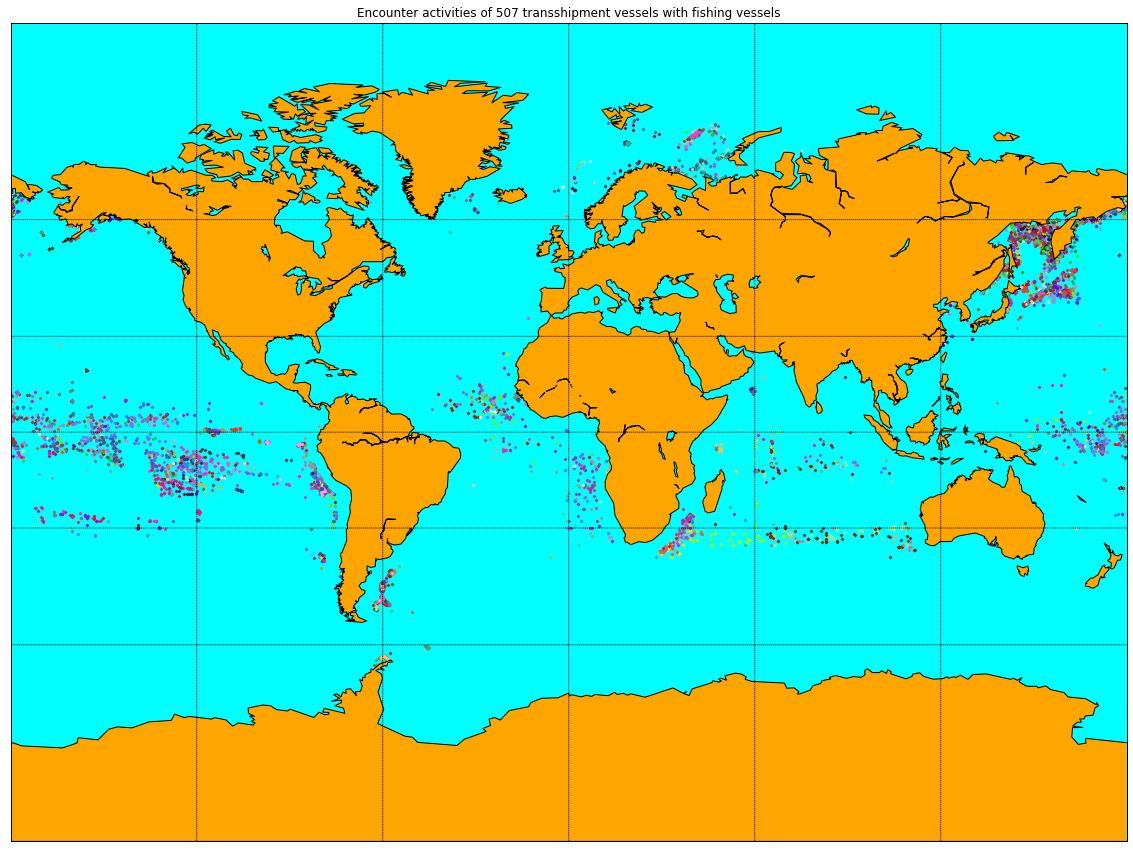

In [113]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

for i in range(len(Names)):
        lon_array = Names[i].mean_longitude.to_numpy()
        lat_array = Names[i].mean_latitude.to_numpy()
        x,y = m(lon_array,lat_array)
        m.scatter(x,y,color=colors[i],marker='D',s=np.pi)
plt.title("Encounter activities of 507 transshipment vessels with fishing vessels")
plt.show()
#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)

In [114]:
df2 = pd.read_csv('loitering-events-v20170717.csv')
df2.head()

,transshipment_mmsi,starting_latitude,starting_longitude,ending_latitude,ending_longitude,starting_timestamp,ending_timestamp,median_speed_knots,total_event_duration
0,256064000,12.793800,-69.503235,12.727950,-69.739120,2017-09-06T02:11:32Z,2017-09-06T15:44:15Z,1.091065,13.915556
1,256064000,25.405013,-56.302800,25.393350,-56.488250,2017-07-22T13:19:49Z,2017-07-22T23:59:17Z,1.548335,10.897639
2,256064000,10.693413,-78.512800,10.484500,-78.884300,2017-11-29T14:48:51Z,2017-11-30T07:43:36Z,1.503456,18.001389
3,256064000,11.858933,-75.553383,12.007627,-75.535627,2017-09-07T23:39:03Z,2017-09-08T14:59:26Z,0.650355,16.193611
4,256064000,45.938747,-23.796960,45.976960,-23.449387,2017-08-17T23:18:21Z,2017-08-18T17:56:30Z,1.009874,19.748333


In [115]:
df2.tail()

,transshipment_mmsi,starting_latitude,starting_longitude,ending_latitude,ending_longitude,starting_timestamp,ending_timestamp,median_speed_knots,total_event_duration
46564,273349630,51.844212,155.520554,52.047413,155.604107,2017-09-29T07:55:39Z,2017-09-29T22:49:11Z,1.092219,16.982917
46565,273349630,48.875252,141.314713,48.712734,141.169724,2016-11-19T08:08:13Z,2016-11-20T00:58:25Z,0.764958,17.053056
46566,273349630,58.127174,153.088516,58.322132,153.115967,2014-06-27T01:32:36Z,2014-06-28T01:21:20Z,0.560717,25.157083
46567,273349630,57.464359,150.262573,57.441532,150.624481,2016-10-29T17:22:12Z,2016-10-30T21:12:23Z,0.545175,29.134444
46568,273349630,57.509228,150.924118,57.617855,151.282272,2015-07-17T18:14:48Z,2015-07-19T01:59:49Z,0.456930,34.060139


In [116]:
len(df2.transshipment_mmsi.unique())

791

In [117]:
transshipment_mmsi = df2['transshipment_mmsi'].unique().tolist()

In [118]:
# # run until value matches len(mmsi_numbers)

letters = string.ascii_lowercase
Ls1 = ''.join(random.choice(letters) for i in range(len(transshipment_mmsi)+1))
letters = string.ascii_uppercase
Ls2 = ''.join(random.choice(letters) for i in range(len(transshipment_mmsi)+1))
Ls3 = ''.join(random.choice(letters) for i in range(len(transshipment_mmsi)+1))
Ls4 = ''.join(random.choice(letters) for i in range(len(transshipment_mmsi)+1))

list_Ls1 = list(Ls1)
list_Ls2 = list(Ls2)
list_Ls3 = list(Ls3)
list_Ls4 = list(Ls4)

Names = []
for i in range(len(transshipment_mmsi)):
    Names.append(list_Ls1[i]+list_Ls2[i]+list_Ls3[i]+list_Ls4[i])
len(set(Names))

791

In [119]:
len(Names)

791

In [120]:
for i in range(len(Names)):
    Names[i] = df2[df2['transshipment_mmsi']==transshipment_mmsi[i]]        

In [121]:
print(Names[40])

      transshipment_mmsi  starting_latitude  starting_longitude  \
3179           374410000          -4.333400          -87.507317   
3180           374410000          -2.046850          -96.955017   
3181           374410000          -3.382000          -97.542282   
3182           374410000         -45.802700          -59.882168   
3183           374410000           0.149767         -113.496681   
...                  ...                ...                 ...   
3310           374410000          -3.606320          -85.659707   
3311           374410000         -45.907982          -59.807335   
3312           374410000          -3.770053          -86.184587   
3313           374410000          -4.400293          -87.036880   
3314           374410000         -14.241183          -80.517212   

      ending_latitude  ending_longitude    starting_timestamp  \
3179        -4.342867        -87.469002  2017-08-22T10:29:50Z   
3180        -1.902733        -97.029701  2017-07-20T04:17:34Z   


In [122]:
colors = []
for i in range(len(transshipment_mmsi)):

    r = random.random()
    b = random.random()
    g = random.random()
    colors.append((r, g, b))

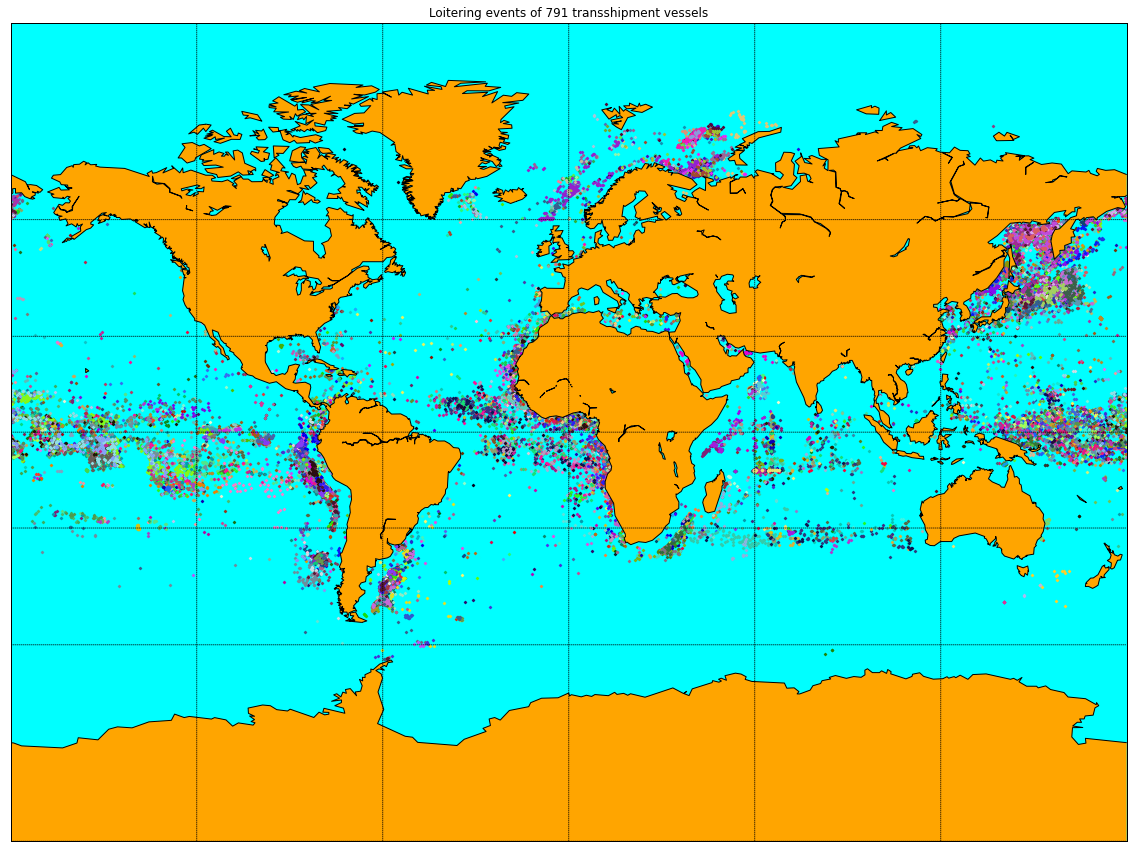

In [123]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

for i in range(len(Names)):
        lon_array = Names[i].ending_longitude.to_numpy()
        lat_array = Names[i].ending_latitude.to_numpy()
        x,y = m(lon_array,lat_array)
        m.scatter(x,y,color=colors[i],marker='D',s=np.pi)
plt.title("Loitering events of 791 transshipment vessels")
plt.show()
#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)